In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
file_path = '/content/sample_data/processed.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,title,categoryName,website,url,reviewsCount,stars,text,latitude,longitude
0,0,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,"One word amazing!! The red fish, halibut, fr...",33.779814,-84.410451
1,1,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,First time here and the food is great and the ...,33.779814,-84.410451
2,2,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,I recently had the pleasure of dining at Optim...,33.779814,-84.410451
3,3,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,Beautiful atmosphere and delicious food. All o...,33.779814,-84.410451
4,4,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,We had a wonderful dinner at the Optimist. Our...,33.779814,-84.410451


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-5-b6bf8cc2865b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


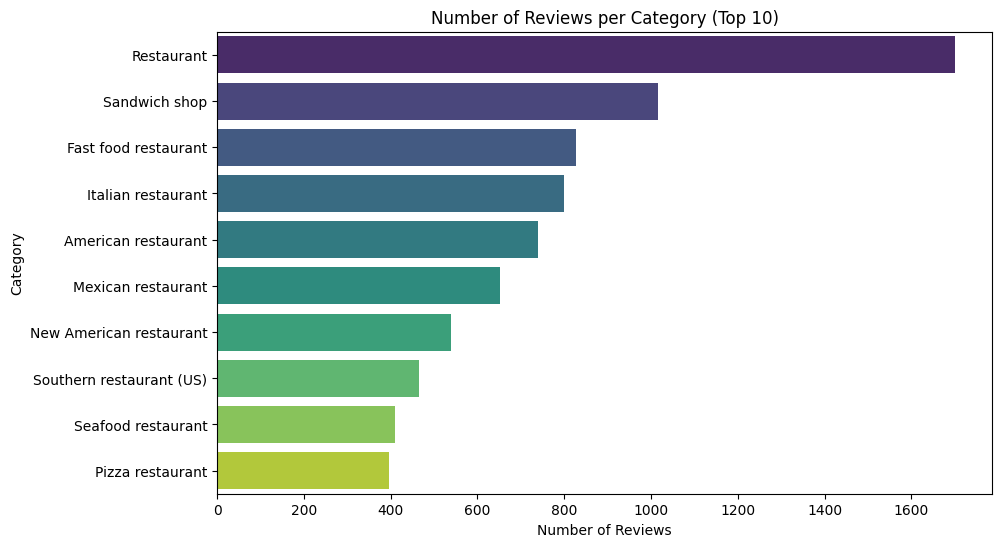

In [5]:
category_counts = df['categoryName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Number of Reviews per Category (Top 10)')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.gca().set_facecolor('none')
plt.savefig('/category_reviews_transparent.png', bbox_inches='tight', transparent=True)
plt.show()

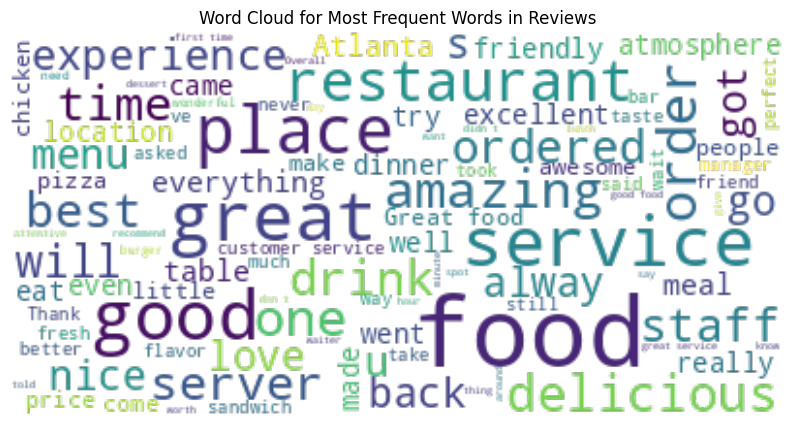

In [8]:
from wordcloud import WordCloud

text = ' '.join(review for review in df.text.dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

wordcloud_transparent = WordCloud(max_font_size=50, max_words=100, background_color=None, mode="RGBA").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_transparent, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Frequent Words in Reviews')
plt.savefig('/wordcloud.png', bbox_inches='tight', transparent=True)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=9, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', linewidth=0.7)
# Save the plot
plt.savefig('distribution_of_ratings.png')
plt.close()


In [10]:
# Visualization 2: Boxplot for Review Counts
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['reviewsCount'])
plt.title('Boxplot for Review Counts')
plt.xlabel('Count')
# Save the plot
plt.savefig('boxplot_for_review_counts.png')
plt.close()

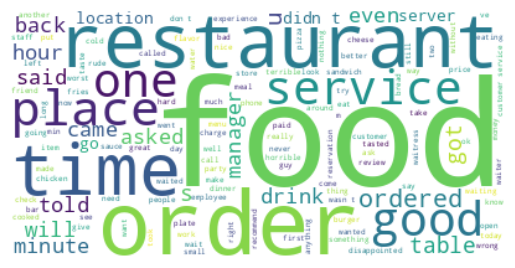

In [13]:
# Visualization 3: Word Frequency from Negative Reviews (assuming a threshold of < 3 for negative reviews)
negative_reviews = df[df['stars'] < 3]['text']
negative_text = " ".join(review for review in negative_reviews)
wordcloud_neg = WordCloud(background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_negative_reviews.png')

In [14]:
# Visualization 4: Aspect Sentiment Distribution - For the purpose of this example, we're assuming 'categoryName' as aspect.
# Since the dataset does not have sentiment analysis done, we'll assume stars 1 and 2 as negative, 3 as neutral, and 4-5 as positive.
conditions = [
    (df['stars'] <= 2),
    (df['stars'] == 3),
    (df['stars'] >= 4)
]
choices = ['negative', 'neutral', 'positive']
df['sentiment'] = pd.Categorical(pd.cut(df['stars'], bins=[0, 2, 3, 5], include_lowest=True, labels=['negative', 'neutral', 'positive']))

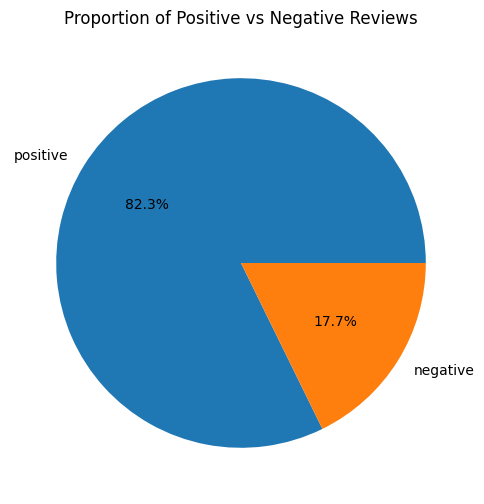

In [16]:
# Visualization 5: Comparison of Positive vs Negative Reviews
# For this, we need to categorize reviews into 'positive' or 'negative' based on 'stars'
df['sentiment'] = ['positive' if star >= 3 else 'negative' for star in df['stars']]
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Positive vs Negative Reviews')
plt.ylabel('')
plt.savefig('positive_vs_negative_reviews.png')